In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from sklearn.datasets import make_classification
X,y=make_classification(n_features=9,n_classes=2,n_clusters_per_class=1,weights=[0.98],random_state=18,n_samples=1000)

In [18]:
X

array([[-1.1066172 ,  1.11942864,  0.43855332, ..., -0.02290384,
         1.01929051,  1.03736221],
       [-0.1934072 ,  0.68199345,  0.31755515, ...,  0.26523125,
         1.47604149, -0.5696077 ],
       [-0.15361183, -0.12846117, -0.47414378, ...,  0.28823062,
         0.75773977, -0.55648661],
       ...,
       [ 0.25240284,  0.86926174, -1.67710374, ...,  0.11266434,
         1.1910284 , -1.19562474],
       [ 0.95059758,  1.25997686,  1.15757151, ...,  0.24470312,
         1.9756688 ,  1.63113293],
       [-0.79616433,  0.52394753,  0.77347398, ...,  0.26460914,
         1.32032449,  0.06726273]])

In [19]:
from collections import Counter
Counter(y)

Counter({0: 978, 1: 22})

In [20]:
df=pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8
0,-1.106617,1.119429,0.438553,0.027757,0.169371,1.025149,-0.022904,1.019291,1.037362
1,-0.193407,0.681993,0.317555,0.053903,1.245853,1.261847,0.265231,1.476041,-0.569608
2,-0.153612,-0.128461,-0.474144,0.810431,1.149495,-1.321468,0.288231,0.757740,-0.556487
3,0.165477,0.611373,0.775933,0.858207,1.716399,0.271448,0.384254,1.771843,0.407971
4,-1.783663,4.282980,-0.924352,-0.376404,-0.153084,-0.882963,-0.283363,3.300381,0.087911


In [22]:
df['Flower']=pd.DataFrame(y)
df.head()

,0,1,2,3,4,5,6,7,8,Flower
0,-1.106617,1.119429,0.438553,0.027757,0.169371,1.025149,-0.022904,1.019291,1.037362,0
1,-0.193407,0.681993,0.317555,0.053903,1.245853,1.261847,0.265231,1.476041,-0.569608,0
2,-0.153612,-0.128461,-0.474144,0.810431,1.149495,-1.321468,0.288231,0.757740,-0.556487,0
3,0.165477,0.611373,0.775933,0.858207,1.716399,0.271448,0.384254,1.771843,0.407971,0
4,-1.783663,4.282980,-0.924352,-0.376404,-0.153084,-0.882963,-0.283363,3.300381,0.087911,0


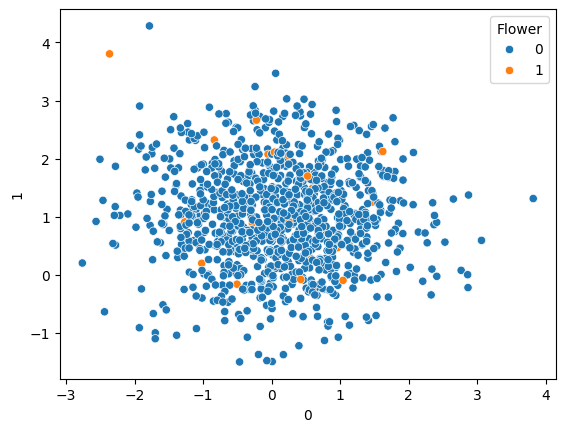

In [25]:
sns.scatterplot(data=df,x=0,y=1,hue='Flower')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.shape,y_train.shape

((700, 9), (700,))

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [36]:
class_weight= [{0:w,1:y}  for w in [1,10,50,100,500] for y in [1,10,50,100,500] ]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 1, 1: 500},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 10, 1: 500},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 50, 1: 500},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100},
 {0: 100, 1: 500},
 {0: 500, 1: 1},
 {0: 500, 1: 10},
 {0: 500, 1: 50},
 {0: 500, 1: 100},
 {0: 500, 1: 500}]

In [48]:
results=[]
for cw in class_weight:
  lr=LogisticRegression(class_weight=cw,random_state=18,n_jobs=-1)
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1score=f1_score(y_test,y_pred)
  results.append({
      'class_weight':cw,
      'Accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1score':f1score
      })

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

        class_weight  Accuracy  precision    recall   f1score
0       {0: 1, 1: 1}  0.973333   1.000000  0.272727  0.428571
1      {0: 1, 1: 10}  0.943333   0.350000  0.636364  0.451613
2      {0: 1, 1: 50}  0.823333   0.137931  0.727273  0.231884
3     {0: 1, 1: 100}  0.766667   0.126582  0.909091  0.222222
4     {0: 1, 1: 500}  0.713333   0.105263  0.909091  0.188679
5      {0: 10, 1: 1}  0.973333   1.000000  0.272727  0.428571
6     {0: 10, 1: 10}  0.976667   1.000000  0.363636  0.533333
7     {0: 10, 1: 50}  0.973333   0.666667  0.545455  0.600000
8    {0: 10, 1: 100}  0.940000   0.333333  0.636364  0.437500
9    {0: 10, 1: 500}  0.820000   0.135593  0.727273  0.228571
10     {0: 50, 1: 1}  0.970000   1.000000  0.181818  0.307692
11    {0: 50, 1: 10}  0.973333   1.000000  0.272727  0.428571
12    {0: 50, 1: 50}  0.976667   1.000000  0.363636  0.533333
13   {0: 50, 1: 100}  0.976667   0.833333  0.454545  0.588235
14   {0: 50, 1: 500}  0.940000   0.333333  0.636364  0.437500
15    {0

In [60]:
results_df.loc[results_df['Accuracy'].idxmax()]['class_weight']

{0: 10, 1: 10}

In [62]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedGroupKFold
cv=StratifiedKFold(random_state=18,shuffle=True)


**Hyper parameter tuning**

In [70]:
penalty=['l1','l2','elasticnet']
c=[0.01,0.001,1.0,1.001,10,50,100]
solver=['saga', 'liblinear', 'lbfgs', 'newton-cholesky', 'newton-cg', 'sag']
max_iter=[100,200,300]
clas_weight=[{0:i,1:j} for i in [1,10,50,100,500] for j in [1,10,50,100,500]]
params=dict(
    penalty=penalty,
    C=c,
    solver=solver,
    class_weight=class_weight,
    max_iter=max_iter

)
params



{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0.01, 0.001, 1.0, 1.001, 10, 50, 100],
 'solver': ['saga',
  'liblinear',
  'lbfgs',
  'newton-cholesky',
  'newton-cg',
  'sag'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 1, 1: 500},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 10, 1: 500},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 50, 1: 500},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100},
  {0: 100, 1: 500},
  {0: 500, 1: 1},
  {0: 500, 1: 10},
  {0: 500, 1: 50},
  {0: 500, 1: 100},
  {0: 500, 1: 500}],
 'max_iter': [100, 200, 300]}

In [71]:
lr=LogisticRegression(random_state=18)

In [72]:
grid=GridSearchCV(estimator=lr,param_grid=params,scoring='accuracy',cv=cv)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=18, shuffle=True),
             estimator=LogisticRegression(random_state=18),
             param_grid={'C': [0.01, 0.001, 1.0, 1.001, 10, 50, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 1, 1: 500}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 50},
                                          {0: 10, 1: 100}, {0: 10, 1: 500},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 50, 1: 500}, {0: 100, 1: 1},
                                          {0: 100, 1: 10}, {0: 100, 1: 50},
                                          {0: 100, 1: 100}, {0: 100, 1: 500},
                                          {0: 500, 1: 1}, {0: 500, 1: 10},
                                          {0: 500, 1: 50}, {0: 500, 1: 100},
                                          {0: 500, 1: 500}],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear', 'lbfgs',
                                    'newton-cholesky', 'newton-cg', 'sag']},
             scoring='accuracy')

In [73]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=18, shuffle=True),
             estimator=LogisticRegression(random_state=18),
             param_grid={'C': [0.01, 0.001, 1.0, 1.001, 10, 50, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 1, 1: 500}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 50},
                                          {0: 10, 1: 100}, {0: 10, 1: 500},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 50, 1: 500}, {0: 100, 1: 1},
                                          {0: 100, 1: 10}, {0: 100, 1: 50},
                                          {0: 100, 1: 100}, {0: 100, 1: 500},
                                          {0: 500, 1: 1}, {0: 500, 1: 10},
                                          {0: 500, 1: 50}, {0: 500, 1: 100},
                                          {0: 500, 1: 500}],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear', 'lbfgs',
                                    'newton-cholesky', 'newton-cg', 'sag']},
             scoring='accuracy')

In [75]:
y_pred=grid.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
confus_matrics=confusion_matrix(y_test,y_pred)
print('confusion matrix',confus_matrics)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
precision=precision_score(y_test,y_pred)
print('precision',precision)
recall=recall_score(y_test,y_pred)
print('recall',recall)
f1score=f1_score(y_test,y_pred)
print('f1score',f1score)

confusion matrix [[289   0]
 [  6   5]]
Accuracy 0.98
precision 1.0
recall 0.45454545454545453
f1score 0.625


In [79]:
grid.best_params_

{'C': 0.001,
 'class_weight': {0: 100, 1: 500},
 'max_iter': 300,
 'penalty': 'l2',
 'solver': 'sag'}